In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [2]:
haberman = pd.read_csv('../input/haberman.csv/haberman.csv')
#,names=['Patient age',"Operate Year","Nodes",'label']
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [3]:
haberman.shape

(305, 4)

**Observations:**
 Dataset= 4 columns, 305 rows
*We have Fields/Features: 'age', 'year', 'nodes', 'status'*

**Explainations**

**age**=age of patient when operated, 
**year**=year of operation,  
**Lymph Node**:Nodes=number of positive axillary nodes detected

*Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52)*

**Survival Status**:
*It represent whether patient survive more than 5 years or less after undergone through surgery.Here if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2*

In [4]:
haberman.head()

haberman.info()

haberman.age.unique()
haberman.age.min()

#haberman.status.value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     305 non-null    int64
 1   year    305 non-null    int64
 2   nodes   305 non-null    int64
 3   status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


30

**Observations**

*No missing values from haberman.info() as non nulls are there*

*Age of patient ranges 30 to 78*

*225 patients survived more than 5 years and 80 died befor 5 years from treatment*

*genral probability of survival for more than 5 years is 225/305*

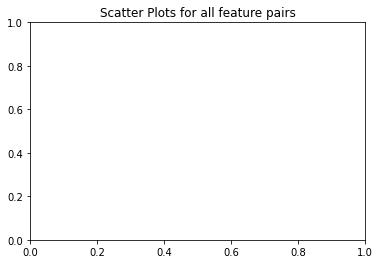

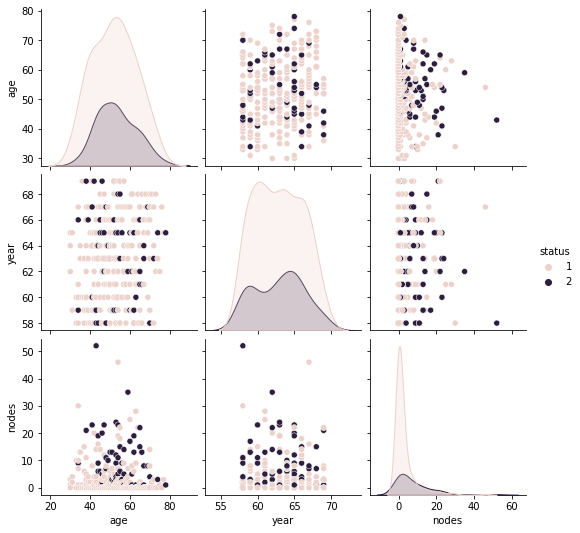

In [5]:
plt.title('Scatter Plots for all feature pairs')
sns.pairplot(haberman,hue='status')
plt.show()




**Observations**

Age-node ( firstrow third column or third row first column ) combination has liitle bit saparation in survivals, 
we can say for age<40 has good survival rate.

at higher age also if nodes are 0 survival is almost sure, but as nodes are increasing 

survival probability seems to be decreasing. died patient has more than 0 nodes.

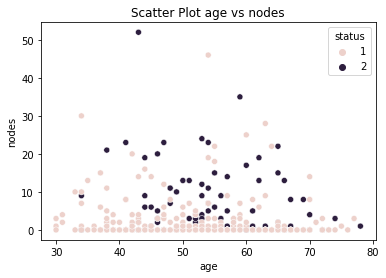

In [6]:
sns.scatterplot(x=haberman['age'],y=haberman['nodes'],hue=haberman['status'])
plt.title('Scatter Plot age vs nodes')
plt.show()

**Observations**

1) below 40 yrs there is lesser Population, came for treatment and there survival rate is quite high as compared to other age ranges

2) If High nodes are developed in a patient probability of survival is decreasing ( Specifically for age>40).





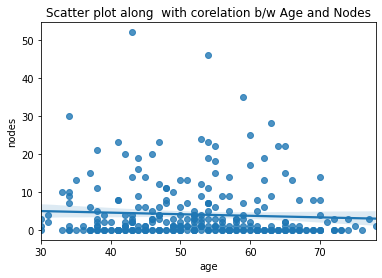

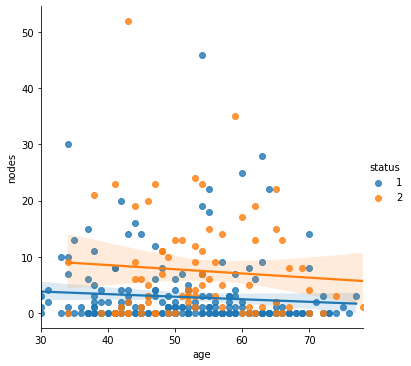

In [7]:
plt.title('Scatter plot along  with corelation b/w Age and Nodes')
sns.regplot(haberman['age'],haberman['nodes'])
sns.lmplot(x='age',y='nodes',hue='status',data=haberman)
plt.show()



**Observations**
Node seems not to be related or weakly negetivly related with age very weak relation depicting higher age people has lower nodes developed.


<AxesSubplot:title={'center':'Scatter plot along  with corelation b/w Age-status and node-status'}, xlabel='age', ylabel='status'>

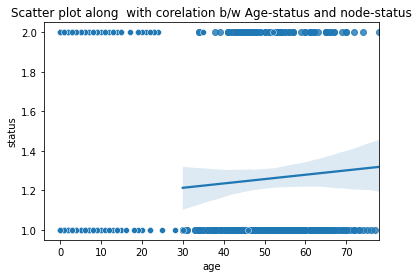

In [8]:
plt.title('Scatter plot along  with corelation b/w Age-status and node-status')

sns.regplot(haberman['age'],haberman['status'])

sns.scatterplot(haberman['nodes'],haberman['status'])



**Observations**
*If we run above code one by one*

1)Age and non-servival(ie non survival after 5 years) seems to have positive but weak corelation so age can also be concidered as factor of death but very weak relation, so have to be carefull.

: Higher Age people tend to have more probability of dieng, though relation is quite weak but it is positive. 2) From previous Regplot between Age and node we saw nodes were reducing with age (Week relation) so we here can say that with increasing age even though nodes are somewhat decreasing dieing probability is increasing so Age is also a factor for Status 2.




<AxesSubplot:xlabel='nodes', ylabel='status'>

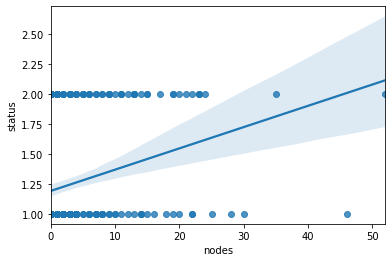

In [9]:
sns.regplot(haberman['nodes'],haberman['status'])




**Observation**

1) relation between nodes and status is very strong ie as nodes increasing death after 5 years chances are increasing very strngly.

2) Most population is found in below 30 nodes. Also density is more at lower nodes.

<AxesSubplot:xlabel='year', ylabel='status'>

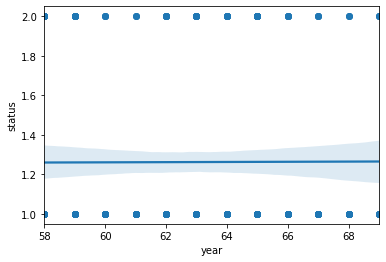

In [10]:
sns.regplot(haberman['year'],haberman['status'])


**Observation**
Year operated and survival does not have any relation so treatments years does not contain much information wrt survival for us.

[]

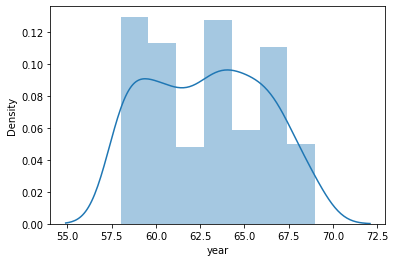

In [11]:
sns.distplot(a=haberman['year'],label="year dist")
plt.plot()


**Observatio**
In certain years like 59-60, 63,65 more people got treatement, we can try to find out why for these years more treatments.

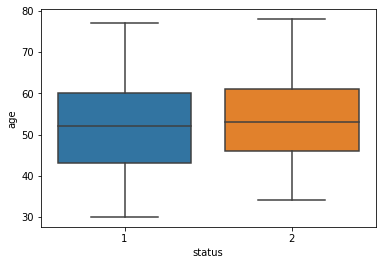

In [12]:
sns.boxplot(x='status', y = 'age', data=haberman)
plt.show()



**Observatios**
there are more people from 40 to 60 year specificaly ~54 age people population is very high of age which are having treatment so 
we can target more testing at age 50 -60
2)Most status 2 people are in range  45 to 60 below45 people seem to have good survival rate.

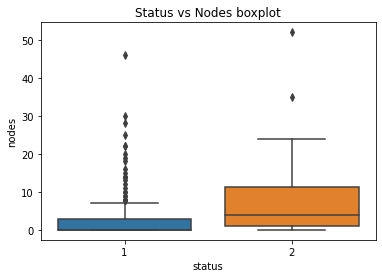

In [13]:
sns.boxplot(x='status', y = 'nodes', data=haberman)
plt.title('Status vs Nodes boxplot')
plt.show()





**Observations**

most of the population that survived was having low nodes developed ( generally near 0), though there are some outliers in status 1 depicting some higher node people also survived 
dead within 5 year have have more variance in nodes and generaly more than 0

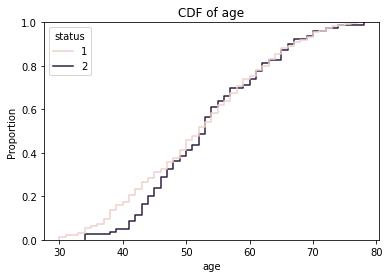

In [14]:
sns.ecdfplot( data = haberman,x='age', hue='status' )
plt.title('CDF of age')
plt.show()



*Observations*

Status 3 curve steepness increasing at appx. 41 of age before that, non survival people are very less.

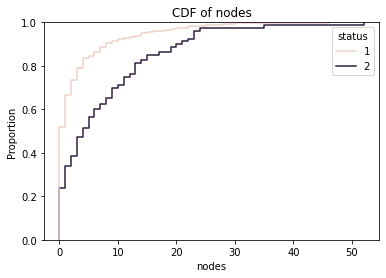

In [15]:
sns.ecdfplot( data = haberman,x='nodes', hue='status' )
plt.title('CDF of nodes')
plt.show()

More than 95% of Population has less than 25 nodes developed.

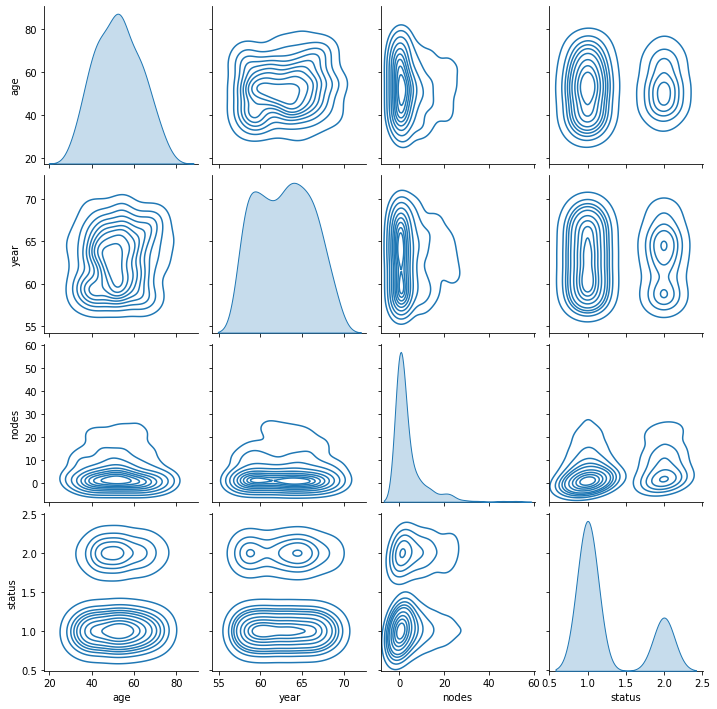

In [16]:
sns.pairplot(data = haberman , kind = 'kde' )
plt.show()



**Observation**

Mostly population is in lower Nodes

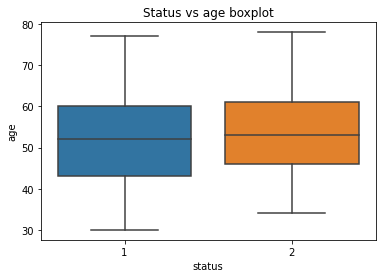

"sns.set(style='whitegrid')\nsns.scatterplot(x='age' , y='nodes' , hue = 'year' , data=haberman , size = 'nodes').set_title('Age vs Nodes with year as hue')\nplt.show()\n# Size parameter increases the size of the dots in ascending order "

In [17]:
sns.boxplot(x='status', y = 'age', data=haberman)
plt.title('Status vs age boxplot')
plt.show()
'''sns.set(style='whitegrid')
sns.scatterplot(x='age' , y='nodes' , hue = 'year' , data=haberman , size = 'nodes').set_title('Age vs Nodes with year as hue')
plt.show()
# Size parameter increases the size of the dots in ascending order '''

**Obsesrvations**

People below 45 are generaly serviving for more than 5 years

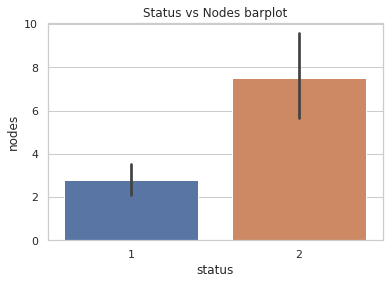

In [18]:

sns.set_theme(style="whitegrid")
sns.barplot(x='status' , y='nodes' , data=haberman )
plt.title('Status vs Nodes barplot')
plt.show()


**Observation**
similar to box plot we can observe status 2 has more variance

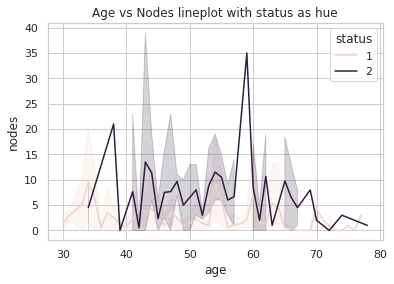

In [19]:
sns.lineplot( x = 'age' , y = 'nodes' , hue = 'status'  , data=haberman)
plt.title('Age vs Nodes lineplot with status as hue')
plt.show()




**Observatio**
It shows ~58 age group patients are having more nodes and died within 5 years 

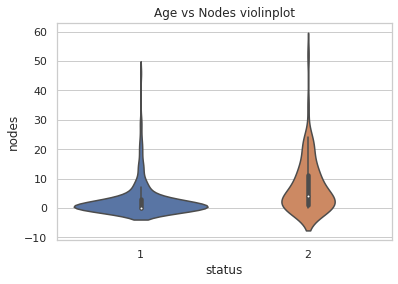

In [20]:
sns.violinplot( x = 'status' , y = 'nodes' , data = haberman )
plt.title('Age vs Nodes violinplot')
plt.show()



**Observations**

Most patient does not develop high nodes means mostly patient are near 0 nodes only

#Patients who survived more than 5 years has generally 0 to 5 or 6 nodes

#died within 5 year tend to have more variance in nodes so 

#is highly likely if nodes are 0 probability of survival is increasing

**Conclusion**:
From above plots we can conclude that the number of nodes is the most important feature that can tell us about survival status. People who have not developed any node are highly likely to survive.

*At age 55-60, avg number of nodes are highest among others*

*More Than 95% Population has less than 25 nodes*

*As the number of nodes increases the patient is more likely to die.*

*Increasing age is also a bit related to non survival though weak positive relation*

*genral probability of survival for more than 5 years is 225/305*

*below 40 yrs there is lesser Population, came for treatment and there survival rate is quite high as compared to other age ranges

*Mostly population is in lower Nodes*



*relation between nodes and status is very strong ie as nodes increasing death after 5 years chances are increasing very strngly

*most of the population that survived was having low nodes developed ( generally near 0), though there are some outliers in status 1 depicting some higher node people also survived 
dead within 5 year have have more variance in nodes and generaly more than 0*






